A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

* Which variables are significant in predicting the demand for shared bikes.
* How well those variables describe the bike demands Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

**Business Goal:** You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

In [ ]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

##  Step 1: Reading and Data Understanding

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# Read through the Dataset

bike = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Linear_Regression_Module_ML/Bike_Price_Assignment/day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [ ]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [ ]:
bike.shape

(730, 16)

In [ ]:
#checking for null values

bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
#renaming the columns for better readability
bike.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [11]:
bike.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
# Copying the dataframe

bike_copy= bike.copy()

In [ ]:
#verify the copied dataframe shape

bike_copy.shape

(730, 16)

In [ ]:
#dropping the duplicates

bike_copy.drop_duplicates(inplace=True)

In [ ]:
#reverify the new dataframe shape and compare if it is still similar to the original dataframe

bike_copy.shape

(730, 16)

####  Conclude that since the shape remains same, we are confirmed that there are no duplicates in the original Dataframe i.e. bike

### Step 2: Data Preparation

In [12]:
# dropping the unwanted columns

bike.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [13]:
# Mapping the season column

bike.season = bike.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [14]:
# Mapping the month column

bike.month = bike.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [15]:
# Mapping the weekday column

bike.weekday = bike.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [16]:
# Mapping the weathersit column

bike.weathersit = bike.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [17]:
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [18]:
bike.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [19]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


### Step 3:  Data Visualization

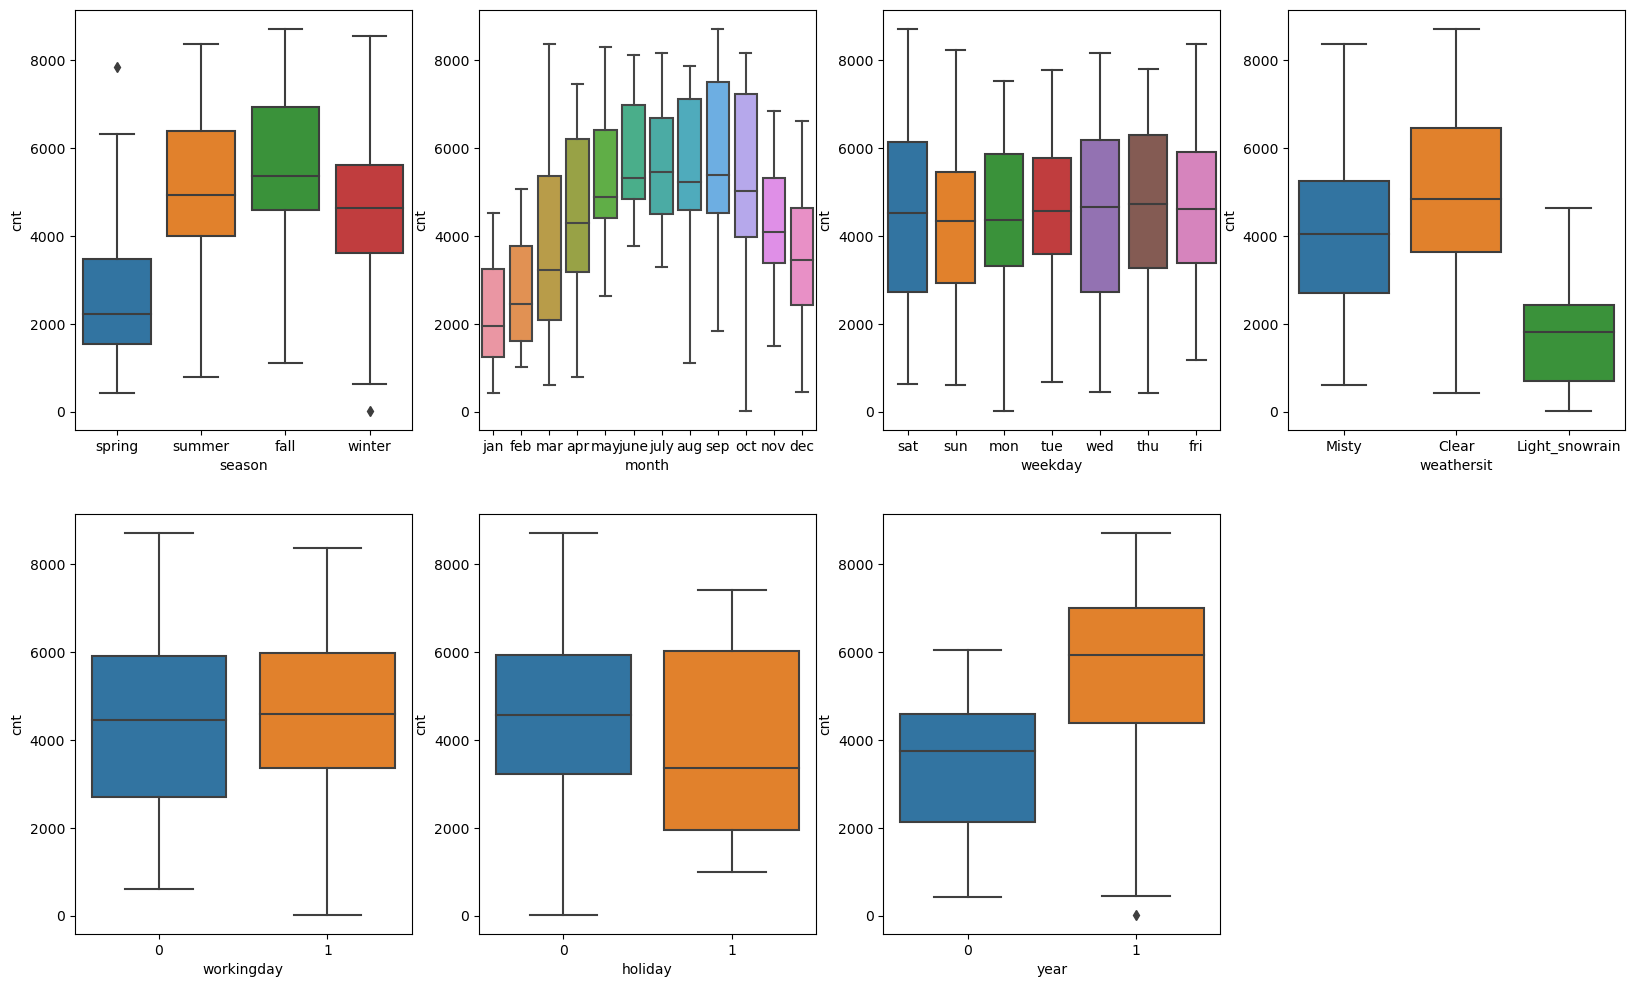

In [ ]:
# Identify how the predictor variable fare against the target variable

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'cnt', data = bike)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,4,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(2,4,6)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'cnt', data = bike)
plt.show()

In [20]:
# create the barplot for the categorical columns

def plot_cat_columns(column):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.barplot(x=column, y='cnt', data=bike)
    plt.subplot(1, 2, 2)
    sns.barplot(x=column, y='cnt', data=bike, hue='year', palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()

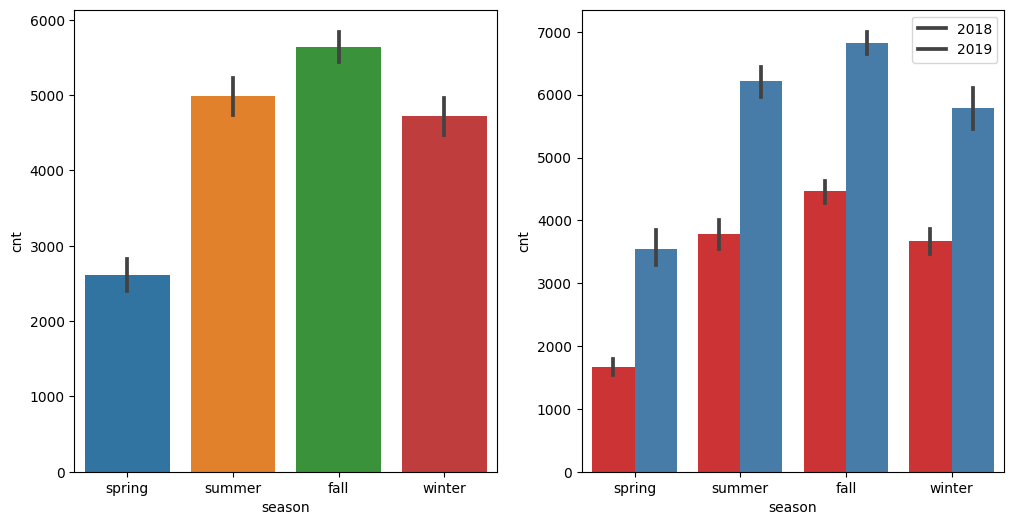

In [21]:
# check the season column
plot_cat_columns('season')


#### 1. We can say that there are more bookings in Fall season.  
#### 2. Also the booking amount increased from 2028 to 2019

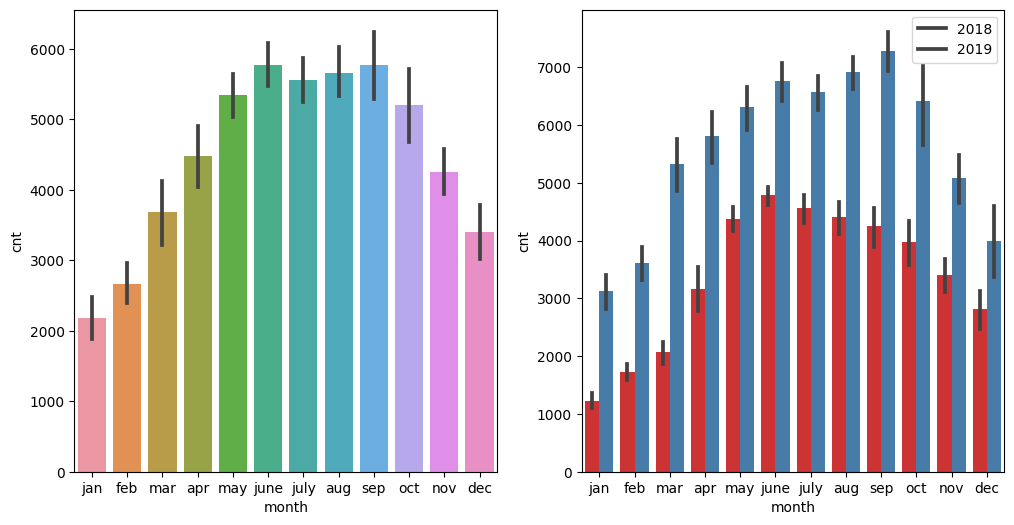

In [22]:
plot_cat_columns('month')

#### 1. Majority of bookings are high from May to October and then starts to dip by end of the year
#### 2. As above, there are more bookings in 2019 as compared to 2018

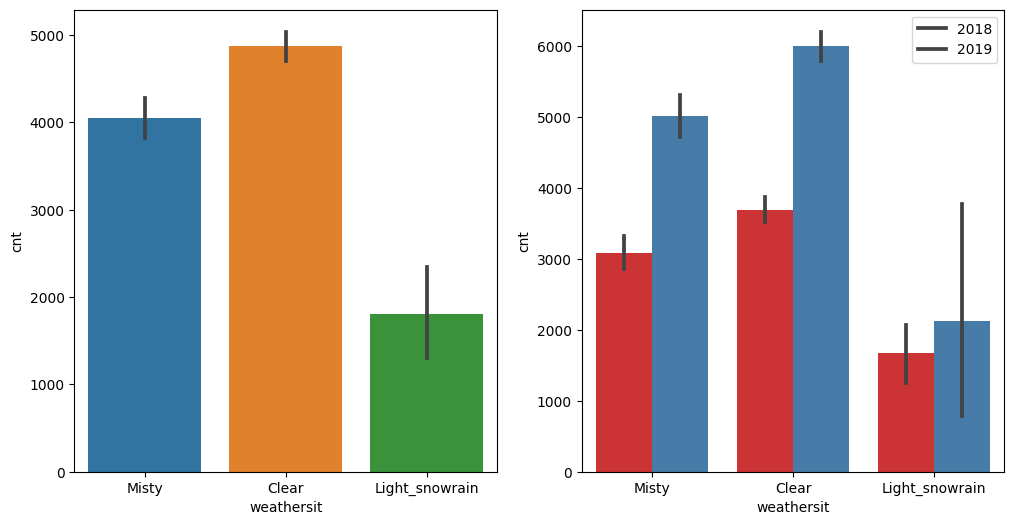

In [23]:
plot_cat_columns('weathersit')

#### Most of the bookings are done when the weather is clear with drastic difference in the LIghtsnow

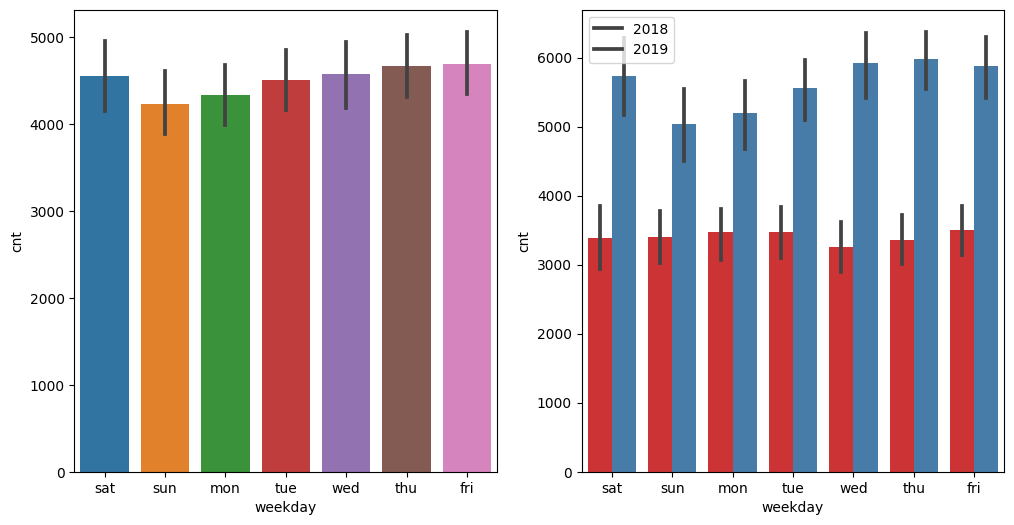

In [24]:
plot_cat_columns('weekday')

#### Overall bookings are pretty much high on the weekend

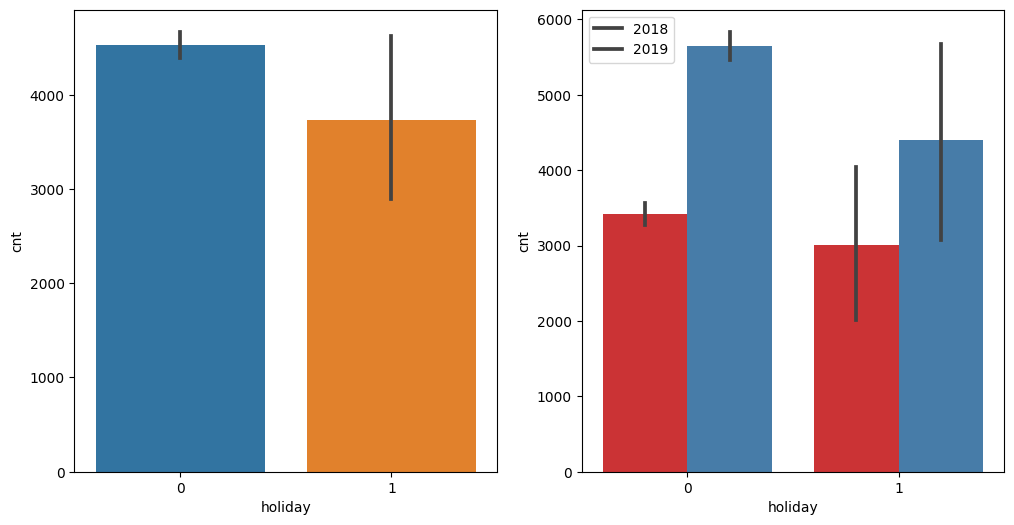

In [25]:
plot_cat_columns('holiday')

#### Appears that on holidays people usually do less bookings than working days

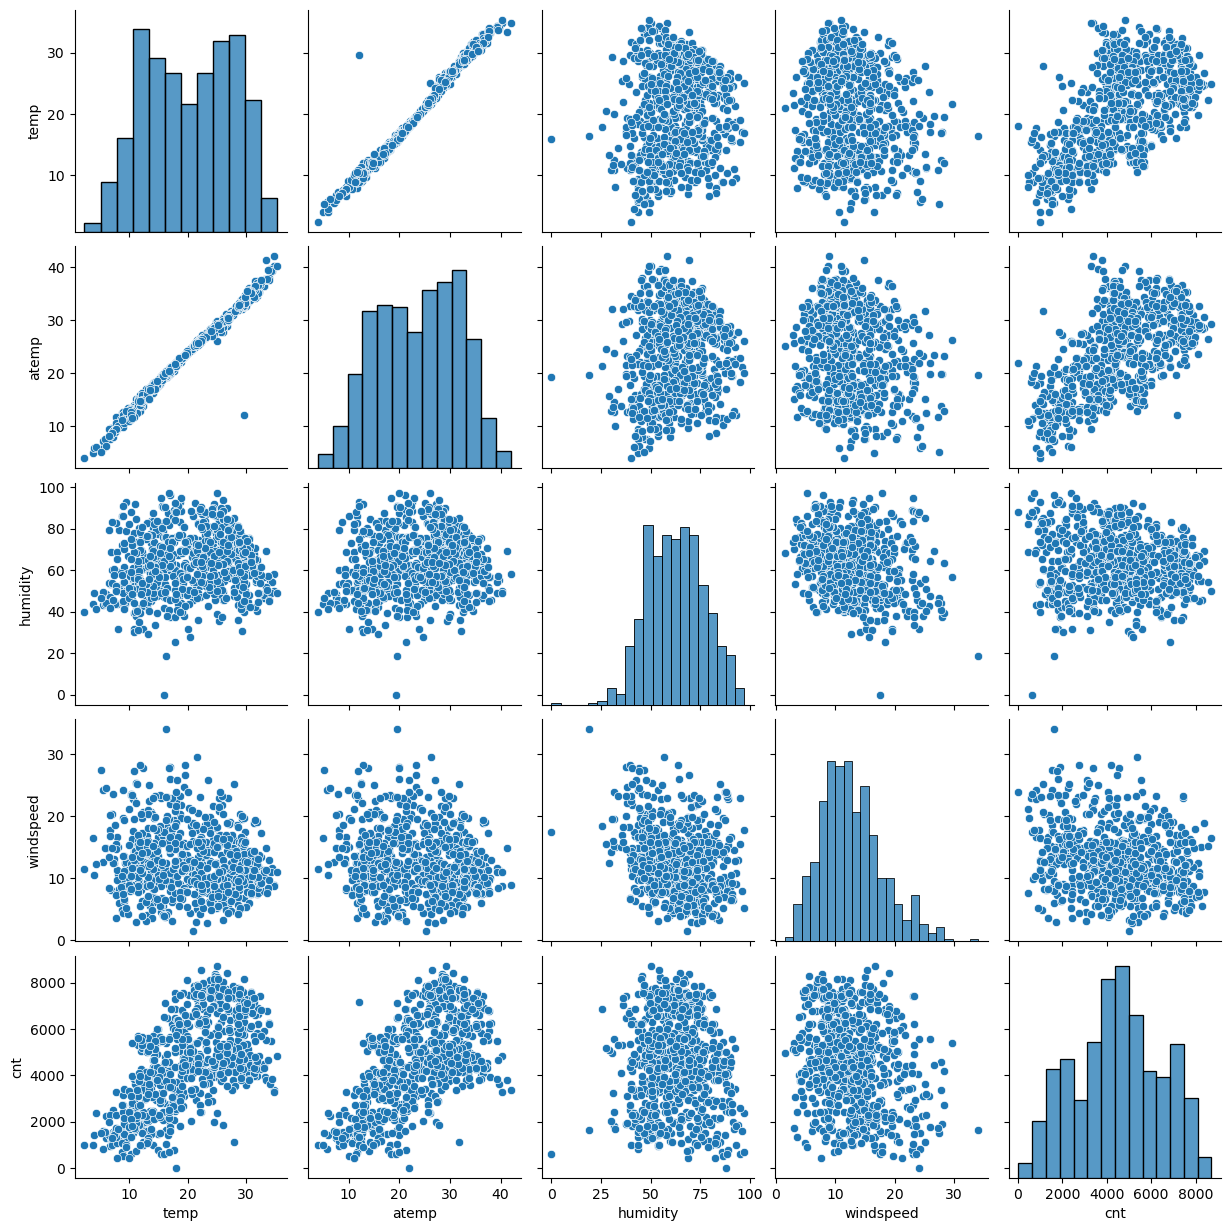

In [ ]:
sns.pairplot(data=bike,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

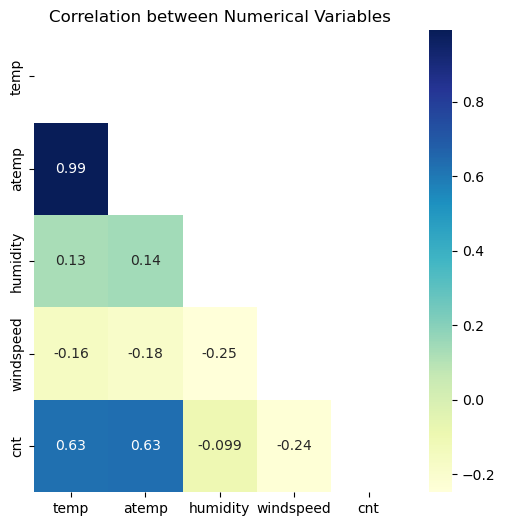

In [ ]:
# Find the correlation between numerical variables
plt.figure(figsize=(6, 6))
corr_matrix = bike[['temp', 'atemp', 'humidity', 'windspeed', 'cnt']].corr()
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", mask=np.triu(corr_matrix))
plt.title("Correlation between Numerical Variables")
plt.show()

#### We can conclude based on the above graph that we have multicolinearity between temp and atemp.

### Step 4:  Dummy Variables CReation

In [26]:
months_df=pd.get_dummies(bike.month,drop_first=True)
weekdays_df=pd.get_dummies(bike.weekday,drop_first=True)
weathersit_df=pd.get_dummies(bike.weathersit,drop_first=True)
seasons_df=pd.get_dummies(bike.season,drop_first=True)

In [27]:
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [28]:
# merging the dataframe

bike_new = pd.concat([bike,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [29]:
bike_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


In [30]:
bike_new.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,0.084932,0.084932,...,0.143836,0.143836,0.142466,0.142466,0.141096,0.028767,0.336986,0.246575,0.252055,0.243836
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,0.278971,0.278971,...,0.351164,0.351164,0.349767,0.349767,0.348359,0.167266,0.473004,0.431313,0.434490,0.429689
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   year            730 non-null    int64  
 2   month           730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   humidity        730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  aug             730 non-null    uint8  
 13  dec             730 non-null    uint8  
 14  feb             730 non-null    uint8  
 15  jan             730 non-null    uint8  
 16  july            730 non-null    uint8  
 17  june            730 non-null    uin

In [32]:
# dropping unwanted columns since we have created dummy variable.

bike_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [33]:
bike_new.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


In [34]:
bike_new.shape

(730, 30)

In [35]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   humidity        730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   aug             730 non-null    uint8  
 9   dec             730 non-null    uint8  
 10  feb             730 non-null    uint8  
 11  jan             730 non-null    uint8  
 12  july            730 non-null    uint8  
 13  june            730 non-null    uint8  
 14  mar             730 non-null    uint8  
 15  may             730 non-null    uint8  
 16  nov             730 non-null    uint8  
 17  oct             730 non-null    uin

### Step 5: Data Splitting into Training and Test Sets

In [36]:
np.random.seed(0)
bike_train, bike_test = train_test_split(bike_new, train_size = 0.7, random_state = 100)

In [37]:
bike_train.shape

(510, 30)

In [38]:
bike_test.shape

(220, 30)

In [39]:
#rescale the features
scaler = MinMaxScaler()

In [40]:
bike_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,0,...,0,0,0,0,0,0,1,0,1,0


In [41]:
# apply scaler to the required columns

num_vars = ['temp','atemp','humidity','windspeed','cnt']
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [42]:
bike_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,0,1,0,1,0


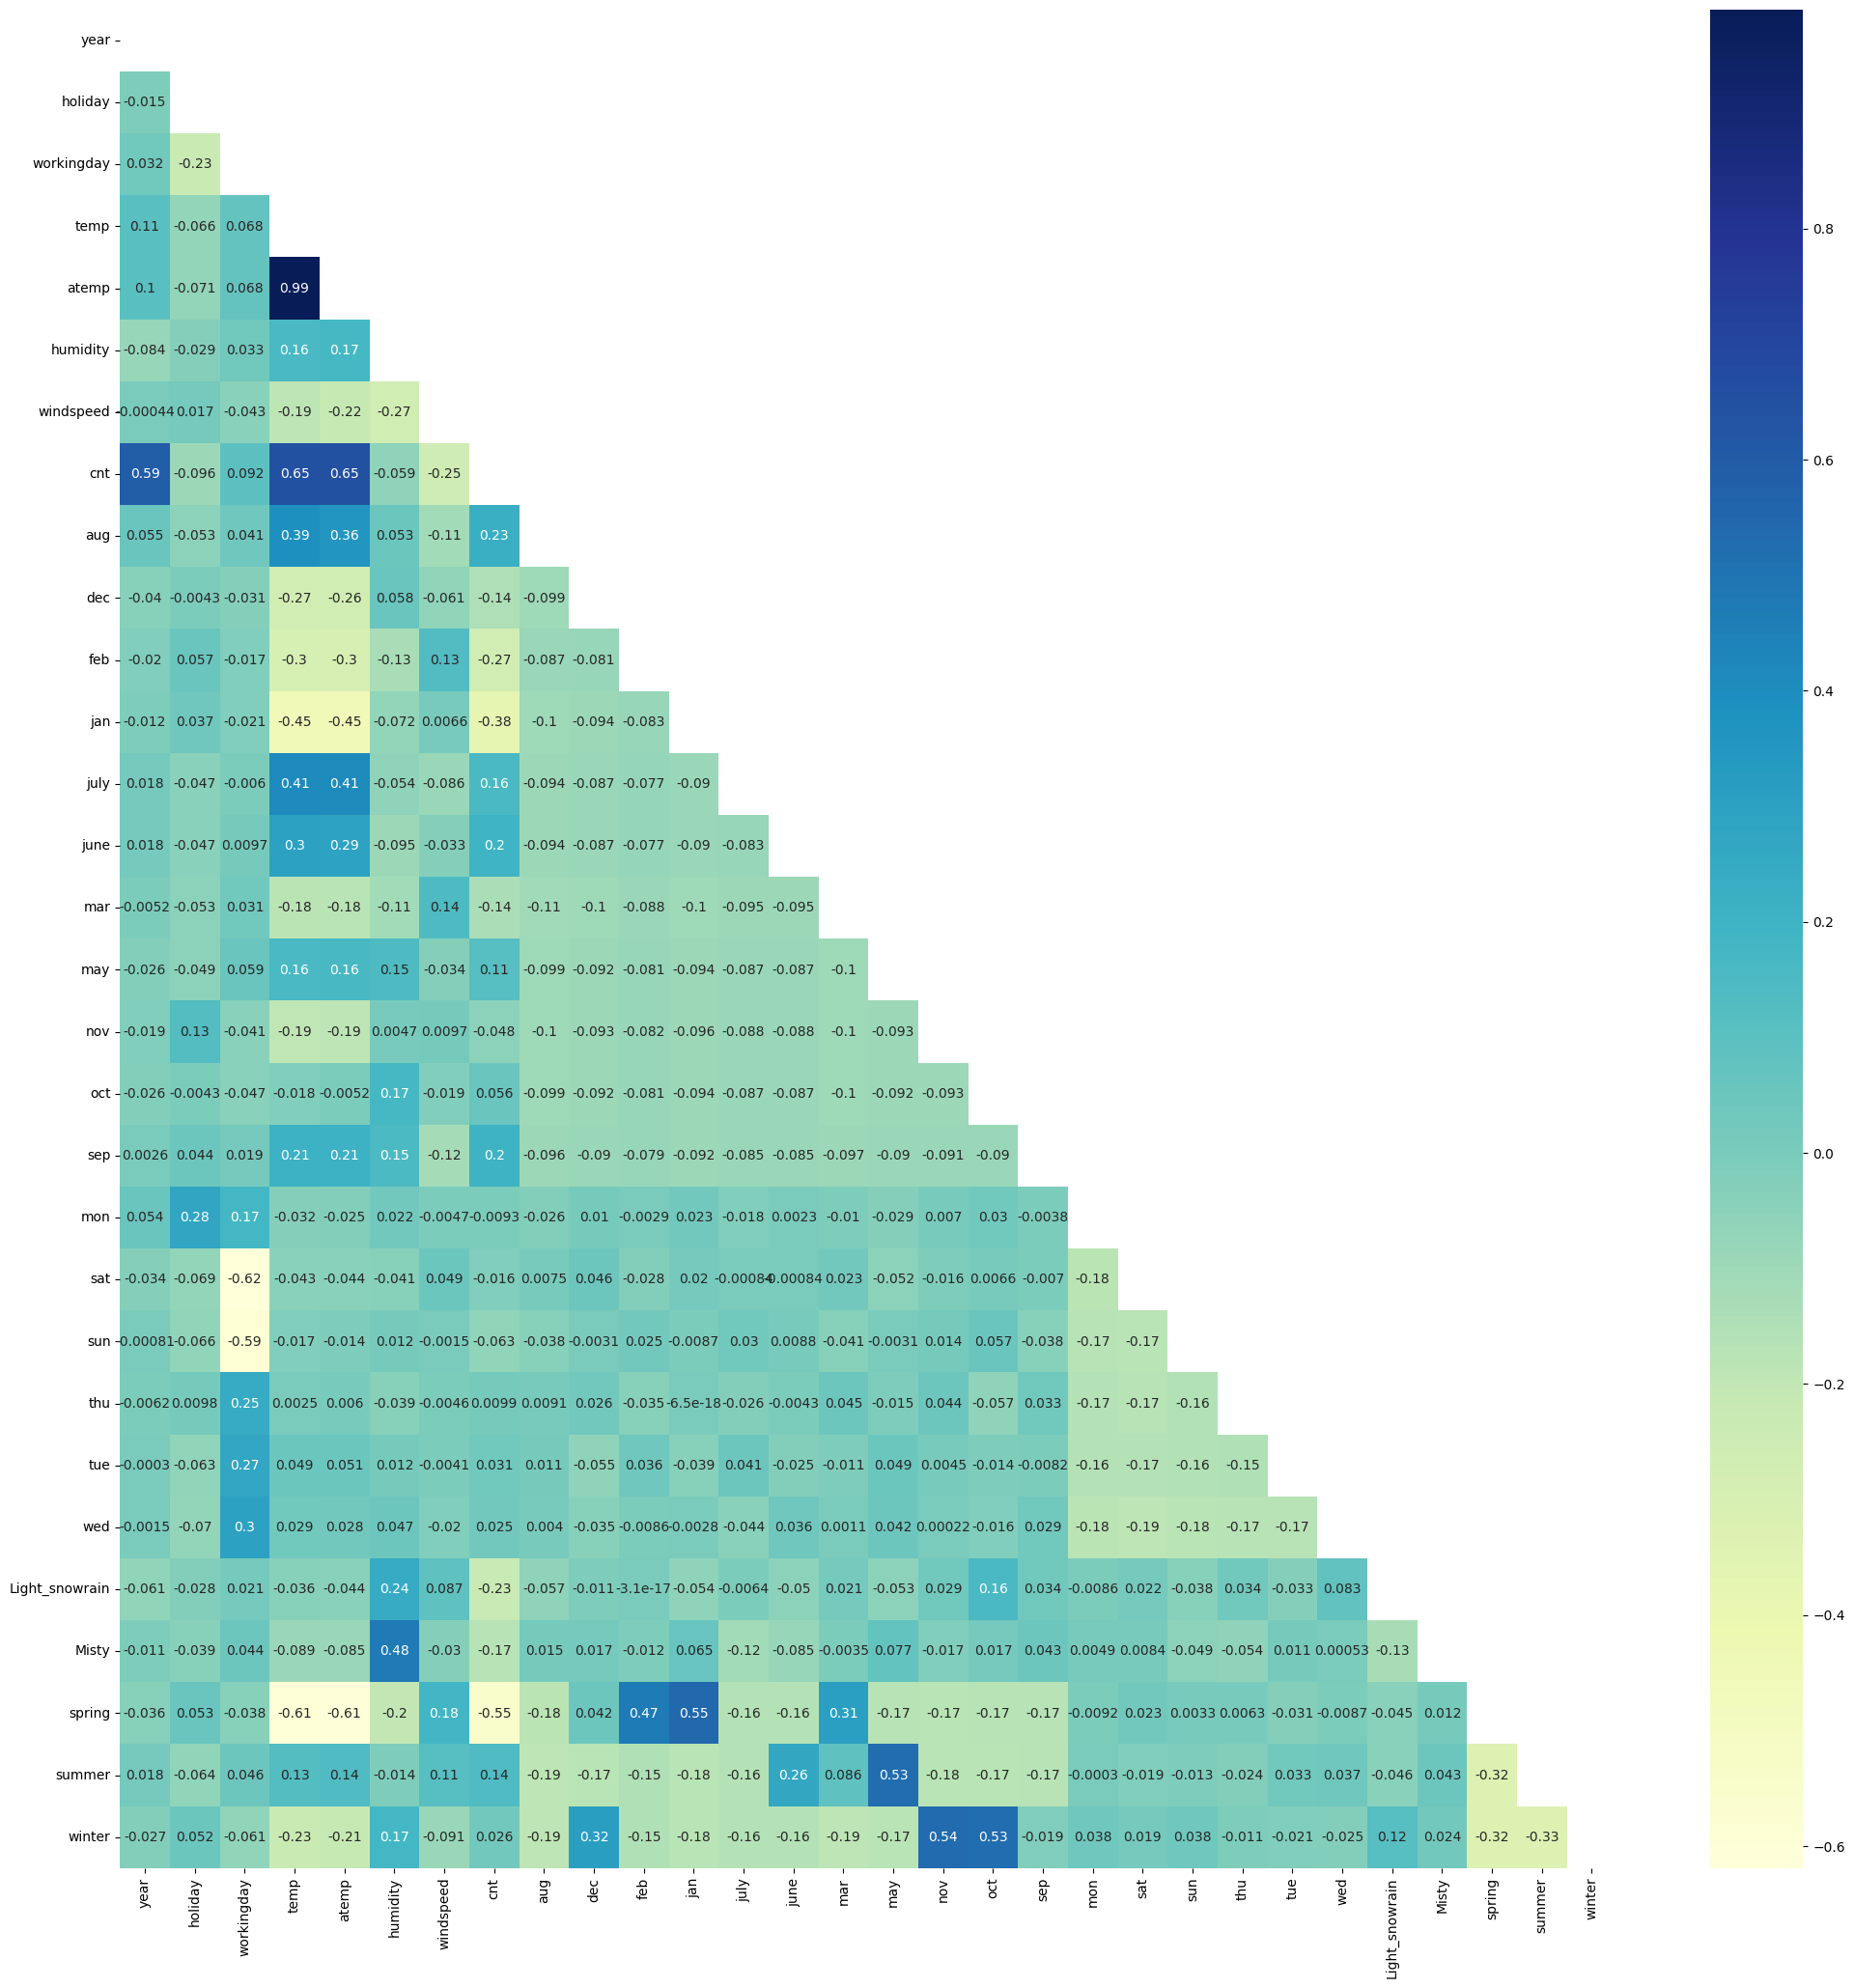

In [43]:
# check the correlation of the variables

plt.figure(figsize = (25,25))
matrix = np.triu(bike_train.corr())
sns.heatmap(bike_train.corr(), annot = True, cmap="YlGnBu", mask=matrix)
plt.show()

#### Conclude that there is corelation between below variables:
##### 1. year and temp variable.
##### 2. misty and humidity variable.
##### 3. SPring season with Jan and Feb.

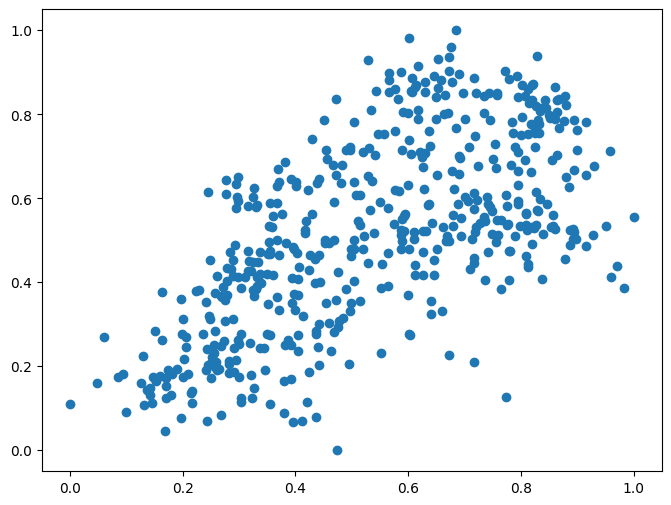

In [44]:
plt.figure(figsize=[8,6])
plt.scatter(bike_train.temp, bike_train.cnt)
plt.show()

### Step 6 Building :Linear models

In [45]:
y_train = bike_train.pop('cnt')
X_train = bike_train

In [46]:
# Recursive feature elimination

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

In [47]:
#top selected variables list
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 10),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 12),
 ('dec', False, 8),
 ('feb', False, 9),
 ('jan', False, 6),
 ('july', True, 1),
 ('june', False, 19),
 ('mar', False, 20),
 ('may', False, 11),
 ('nov', False, 7),
 ('oct', False, 18),
 ('sep', True, 1),
 ('mon', False, 14),
 ('sat', False, 4),
 ('sun', False, 13),
 ('thu', False, 16),
 ('tue', False, 15),
 ('wed', False, 17),
 ('Light_snowrain', True, 1),
 ('Misty', False, 3),
 ('spring', False, 2),
 ('summer', True, 1),
 ('winter', True, 1)]

In [48]:
col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'july', 'sep',
       'Light_snowrain', 'summer', 'winter'],
      dtype='object')


In [49]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'aug', 'dec', 'feb', 'jan', 'june', 'mar', 'may',
       'nov', 'oct', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed', 'Misty',
       'spring'],
      dtype='object')

In [63]:
X_train_1 = X_train[col]

In [64]:
X_train_sm = sm.add_constant(X_train_1)

# Create  a model
lr = sm.OLS(y_train,X_train_sm)

# Fit the Model
lr_model=lr.fit()

# Params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.6
Date:                Tue, 21 Nov 2023   Prob (F-statistic):          2.79e-186
Time:                        19:32:21   Log-Likelihood:                 494.18
No. Observations:                 510   AIC:                            -966.4
Df Residuals:                     499   BIC:                            -919.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2682      0.026     10.292      0.000       0.217       0.319
year               0.2259      0.008     27.118      0.000       0.210       0.242
holiday           -0.0930      0.026     -3.543      0.000      -0.145      -0.041
temp               0.6200      0.023     27.492      0.000       0.576       0.664
humidity          -0.2868      0.032     -9.045      0.000      -0.349      -0.224
windspeed         -0.2059      0.026     -7.889      0.000      -0.257      -0.155
july              -0.0482      0.018     -2.606      0.009      -0.085      -0.012
sep                0.0944      0.016      5.724      0.000       0.062       0.127
Light_snowrain    -0.1914      0.026     -7.470      0.000      -0.242      -0.141
summer             0.0800      0.011      7.281      0.000       0.058       0.102
winter             0.1390      0.011     12.903      0.000       0.118       0.160
==============================================================================
Omnibus:                       53.056   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.833
Skew:                          -0.655   Prob(JB):                     6.94e-21
Kurtosis:                       4.629   Cond. No.                         15.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
#function to create the VIF

def calculate_VIF(df):
    return pd.DataFrame({'Features': df.columns, 'VIF': [round(variance_inflation_factor(df.values, i), 2) for i in range(df.shape[1])]}).sort_values(by='VIF', ascending=False)


In [65]:
calculate_VIF(X_train_1)

,Features,VIF
3,humidity,10.29
2,temp,9.29
4,windspeed,3.54
0,year,2.02
8,summer,1.76
9,winter,1.68
5,july,1.55
6,sep,1.29
7,Light_snowrain,1.09
1,holiday,1.04


In [ ]:
# Creating another model

X_train_2=X_train_1.drop('humidity',axis=1)

In [67]:
X_train_sm_2 = sm.add_constant(X_train_2)

# Create  a model
lr = sm.OLS(y_train,X_train_sm_2)

# Fit the Model
lr_model=lr.fit()

# Params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     229.0
Date:                Tue, 21 Nov 2023   Prob (F-statistic):          4.42e-171
Time:                        19:33:54   Log-Likelihood:                 455.47
No. Observations:                 510   AIC:                            -890.9
Df Residuals:                     500   BIC:                            -848.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0840      0.018      4.794      0.000       0.050       0.118
year               0.2329      0.009     26.061      0.000       0.215       0.251
holiday           -0.0875      0.028     -3.094      0.002      -0.143      -0.032
temp               0.5854      0.024     24.438      0.000       0.538       0.632
windspeed         -0.1459      0.027     -5.365      0.000      -0.199      -0.092
july              -0.0313      0.020     -1.578      0.115      -0.070       0.008
sep                0.0822      0.018      4.640      0.000       0.047       0.117
Light_snowrain    -0.2524      0.027     -9.477      0.000      -0.305      -0.200
summer             0.0750      0.012      6.346      0.000       0.052       0.098
winter             0.1228      0.011     10.731      0.000       0.100       0.145
==============================================================================
Omnibus:                       60.888   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.629
Skew:                          -0.747   Prob(JB):                     3.14e-23
Kurtosis:                       4.625   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
calculate_VIF(X_train_2)

,Features,VIF
2,temp,4.96
3,windspeed,3.01
0,year,2.00
7,summer,1.75
4,july,1.51
8,winter,1.43
5,sep,1.28
6,Light_snowrain,1.06
1,holiday,1.03


In [69]:
# Creating another model

X_train_3=X_train_2.drop('july',axis=1)

In [70]:
X_train_sm_3 = sm.add_constant(X_train_3)

# Create  a model
lr = sm.OLS(y_train,X_train_sm_3)

# Fit the Model
lr_model=lr.fit()

# Params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     256.6
Date:                Tue, 21 Nov 2023   Prob (F-statistic):          9.22e-172
Time:                        19:36:23   Log-Likelihood:                 454.20
No. Observations:                 510   AIC:                            -890.4
Df Residuals:                     501   BIC:                            -852.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0875      0.017      5.029      0.000       0.053       0.122
year               0.2334      0.009     26.093      0.000       0.216       0.251
holiday           -0.0867      0.028     -3.060      0.002      -0.142      -0.031
temp               0.5682      0.021     26.580      0.000       0.526       0.610
windspeed         -0.1455      0.027     -5.340      0.000      -0.199      -0.092
sep                0.0895      0.017      5.229      0.000       0.056       0.123
Light_snowrain    -0.2535      0.027     -9.506      0.000      -0.306      -0.201
summer             0.0812      0.011      7.256      0.000       0.059       0.103
winter             0.1261      0.011     11.179      0.000       0.104       0.148
==============================================================================
Omnibus:                       62.269   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.317
Skew:                          -0.761   Prob(JB):                     8.20e-24
Kurtosis:                       4.640   Cond. No.                         9.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
calculate_VIF(X_train_3)

,Features,VIF
2,temp,3.63
3,windspeed,2.97
0,year,2.00
6,summer,1.55
7,winter,1.34
4,sep,1.20
5,Light_snowrain,1.06
1,holiday,1.03


# **Residual Analaysis**

In [74]:
y_train_pred = lr_model.predict(X_train_sm_3)


<ipython-input-79-baf37e593efd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res)


<Axes: ylabel='Density'>

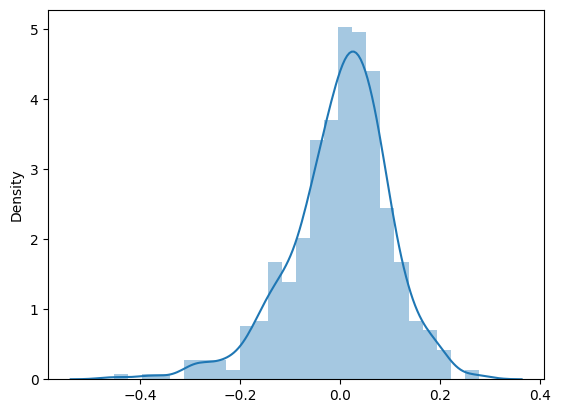

In [79]:
res=y_train-y_train_pred
sns.distplot(res)

# Evaluation and Prediction on Test sets

In [ ]:
num_vars = ['temp','atemp','humidity','windspeed','cnt']
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.describe()

In [89]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [92]:
X_test_1 = X_test[col]
X_test_2 = X_test_1.drop(['humidity','july'],axis=1)
X_test_sm_1 = sm.add_constant(X_test_2)
X_test_sm_1

,const,year,holiday,temp,windspeed,sep,Light_snowrain,summer,winter
184,1.0,0,1,0.831783,0.084219,0,0,0,0
535,1.0,1,0,0.901354,0.153728,0,0,1,0
299,1.0,0,0,0.511964,0.334206,0,0,0,1
221,1.0,0,0,0.881625,0.339570,0,0,0,0
152,1.0,0,0,0.817246,0.537414,0,0,1,0
...,...,...,...,...,...,...,...,...,...
702,1.0,1,0,0.519232,0.283397,0,0,0,1
127,1.0,0,0,0.584649,0.069510,0,0,1,0
640,1.0,1,0,0.745598,0.052115,0,0,0,1
72,1.0,0,0,0.331557,0.203418,0,0,0,0


In [93]:
# Predict the test data

y_test_pred = lr_model.predict(X_test_sm_1)
y_test_pred

184    0.461238
535    0.891909
299    0.455879
221    0.539079
152    0.554866
         ...   
702    0.700835
127    0.490771
640    0.863105
72     0.246330
653    0.692994
Length: 220, dtype: float64

In [95]:
# r2 Score of the Training Set

r2_score(y_true=y_test,y_pred=y_test_pred)

0.7720731949554798